**Laden der Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fft import fft, ifft, fftfreq, fft2, ifft2
from scipy.signal import find_peaks
from IPython.display import Audio
import librosa
from librosa import display
import soundfile as sf
from PIL import Image
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

## **Aufgabe 1**

**Aufgabe 1.a**

In [2]:
def fourier_koeffizient(x, y, k):
    # Berechnung des Exponentialterms e^(-ikx)
    exponent = np.exp(-1j * k * x)
    
    # Berechnung des Produkts f(x) * e^(-ikx)
    integrand = y * exponent
    
    # Numerische Integration mit der Trapezregel
    integral = np.trapz(integrand, x)
    
    # Berechnung des Fourier-Koeffizienten
    c_k = (1 / (2 * np.pi)) * integral
    
    return c_k

**Aufgabe 1.b**

In [3]:
def fourier_approximation(x, y, m):
    # Skalierung des Intervalls für die Berechnung der Fourier-Koeffizienten
    xx = x * np.pi / max(x)
    # Array zur Speicherung der Fourier-Approximation initialisieren
    fapp = np.zeros_like(x, dtype=complex)
    # Berechnung des Nullten Fourier-Koeffizienten
    f0 = fourier_koeffizient(xx, y, 0)
    fapp += f0 * np.ones(x.shape, dtype=complex)
    # Berechnung und Summation der Fourier-Komponenten
    for k in range(1, m + 1):
        fk = fourier_koeffizient(xx, y, k)
        fnegk = fourier_koeffizient(xx, y, -k)
        fapp += (fk + fnegk) * np.cos(xx * k) + 1j * (fk - fnegk) * np.sin(xx * k)
    # Rückgabe der realen Teile der Fourier-Approximation
    return fapp.real

**Aufgabe 1.c**

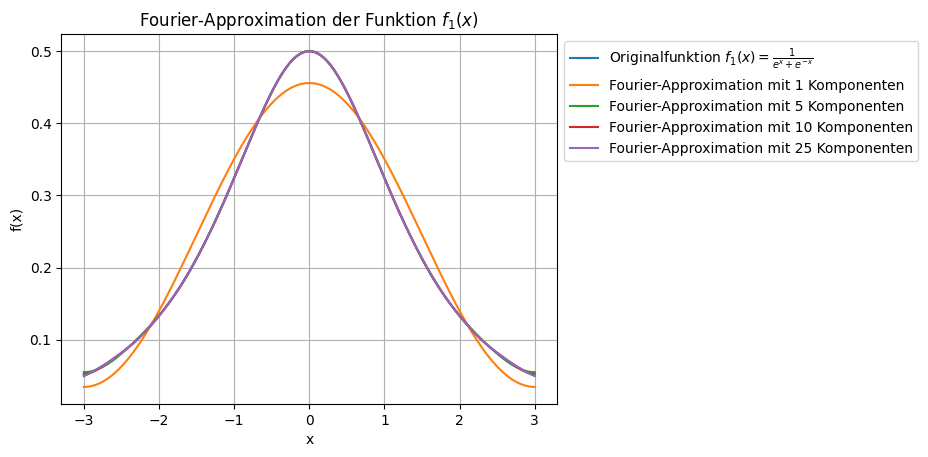

In [4]:
# Definieren der Funktionen
def f1(x):
    return 1 / (np.exp(x) + np.exp(-x))

# Diskretisierung des Intervalls [-3, 3] mit N = 600 Schritten
N = 600
x = np.linspace(-3, 3, N)
y = f1(x)

# Plotten der Originalfunktion
plt.plot(x, y, label='Originalfunktion $f_1(x) = \\frac{1}{e^x + e^{-x}}$')

# Berechnung und Plotten der Fourier-Approximationen für verschiedene m-Werte
for m in [1, 5, 10, 25]:
    fapp = fourier_approximation(x, y, m)
    plt.plot(x, fapp, label=f'Fourier-Approximation mit {m} Komponenten')

# Plot-Details hinzufügen
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Fourier-Approximation der Funktion $f_1(x)$')
plt.grid(True)
plt.show()

**Aufgabe 1.d**

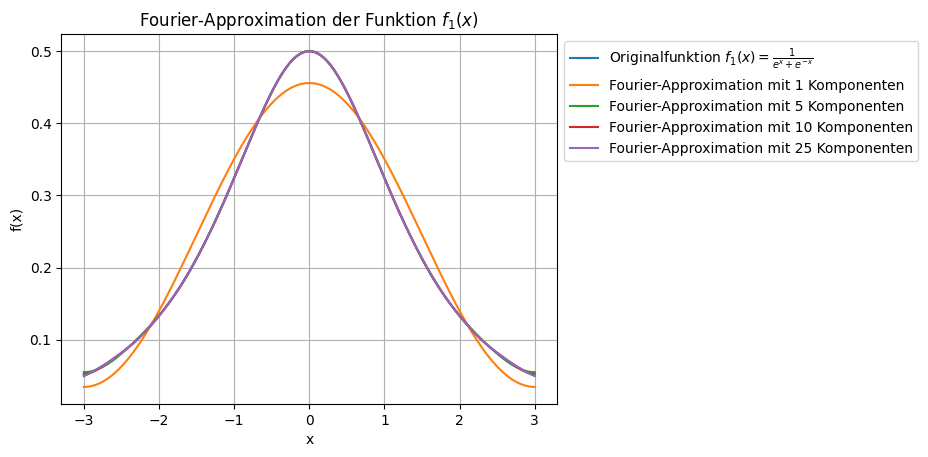

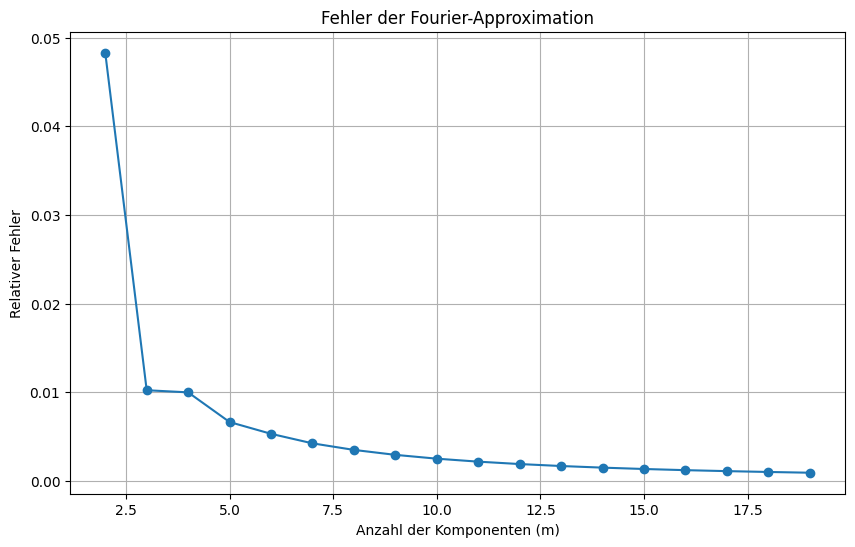

Minimale Anzahl von Fourier-Komponenten für einen Fehler von höchstens 0,1%: 19


In [5]:
# Funktion zur Berechnung des relativen Fehlers
def relativer_fehler(f, f_app):
    return np.mean(np.abs(f - f_app) / np.abs(f))

# Definieren der Funktionen
def f1(x):
    return 1 / (np.exp(x) + np.exp(-x))

# Diskretisierung des Intervalls [-3, 3] mit N = 600 Schritten
N = 600
x = np.linspace(-3, 3, N)
y = f1(x)

# Plotten der Originalfunktion
plt.plot(x, y, label='Originalfunktion $f_1(x) = \\frac{1}{e^x + e^{-x}}$')

# Berechnung und Plotten der Fourier-Approximationen für verschiedene m-Werte
for m in [1, 5, 10, 25]:
    fapp = fourier_approximation(x, y, m)
    plt.plot(x, fapp, label=f'Fourier-Approximation mit {m} Komponenten')

# Plot-Details hinzufügen
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Fourier-Approximation der Funktion $f_1(x)$')
plt.grid(True)
plt.show()

# Initialisierung der Listen für Fehler und m-Werte
errs = []
mm = []

# Bestimmen der minimalen Anzahl von Fourier-Komponenten, die benötigt werden
abweichung = 0.001  # Toleranz von 0,1%

for m in range(2, 100):
    mm.append(m)
    fapp = fourier_approximation(x, y, m)
    err = relativer_fehler(y, fapp)
    errs.append(err)
    if err <= abweichung:
        break

# Plotten der Fehlerkurve
plt.figure(figsize=(10, 6))
plt.plot(mm, errs, marker='o')
plt.xlabel('Anzahl der Komponenten (m)')
plt.ylabel('Relativer Fehler')
plt.title('Fehler der Fourier-Approximation')
plt.grid(True)
plt.show()

min_m = next((m for m, err in zip(mm, errs) if err <= abweichung), None)
if min_m is not None:
    print(f'Minimale Anzahl von Fourier-Komponenten für einen Fehler von höchstens 0,1%: {min_m}')
else:
    print('Keine ausreichende Approximation für einen Fehler von höchstens 0,1% gefunden.')

**Aufgabe 1.e**

In [6]:
# Definieren der Funktionen
def f2(x):
    return np.exp(x)

def f3(x):
    return np.exp(np.abs(x))

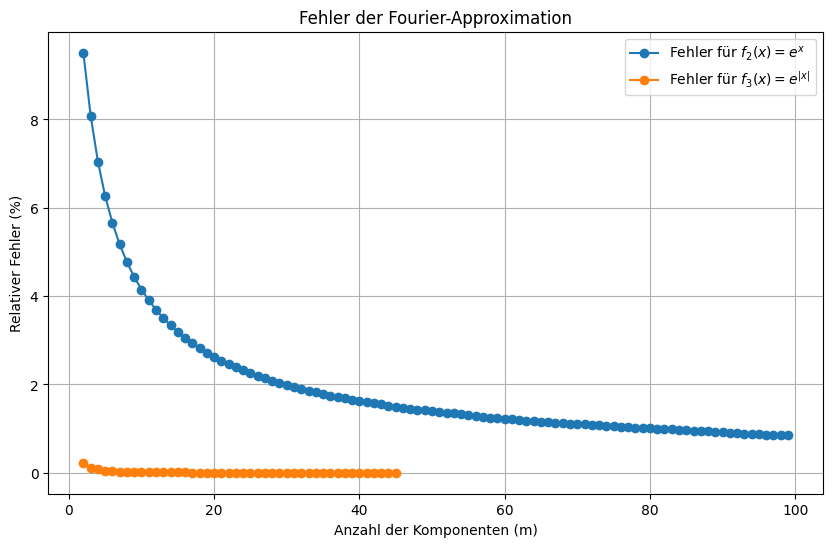

Keine ausreichende Approximation für f2(x) innerhalb des gegebenen Bereichs gefunden.
Minimale Anzahl von Fourier-Komponenten für f3(x) mit einem Fehler von höchstens 0,1%: 91


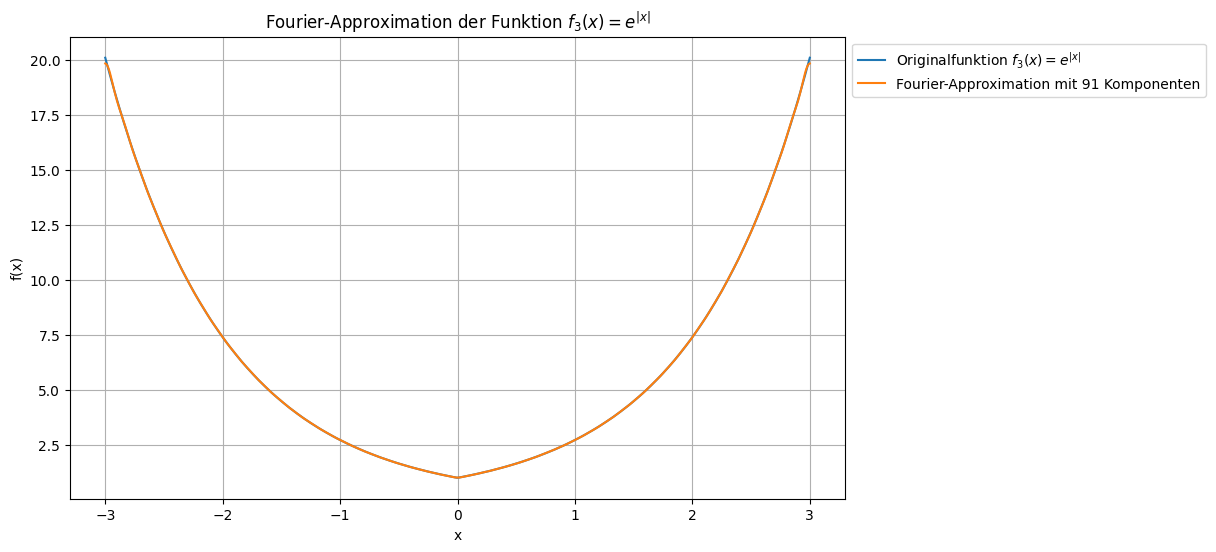

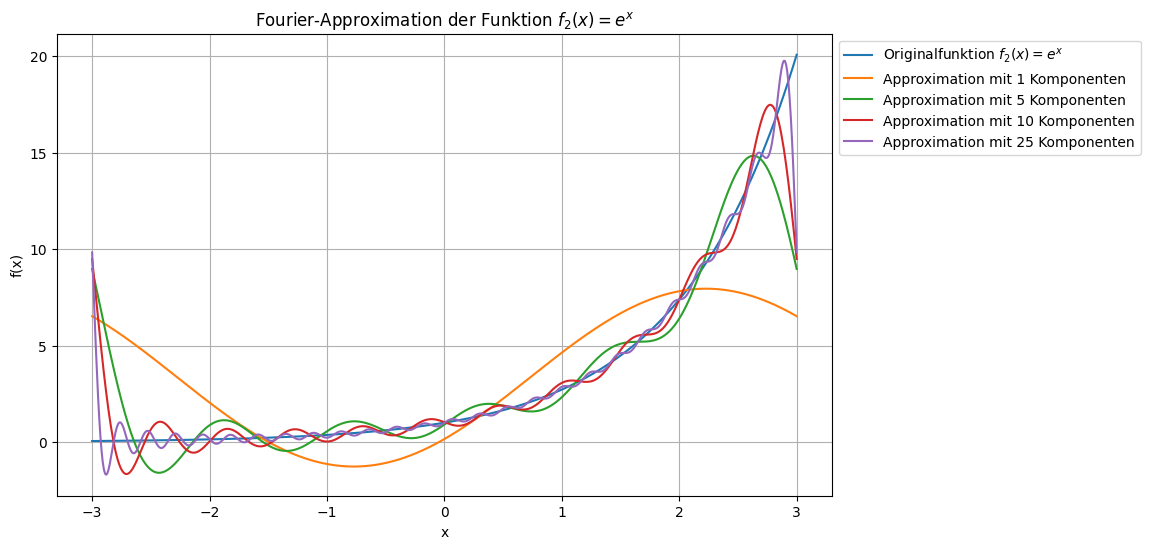

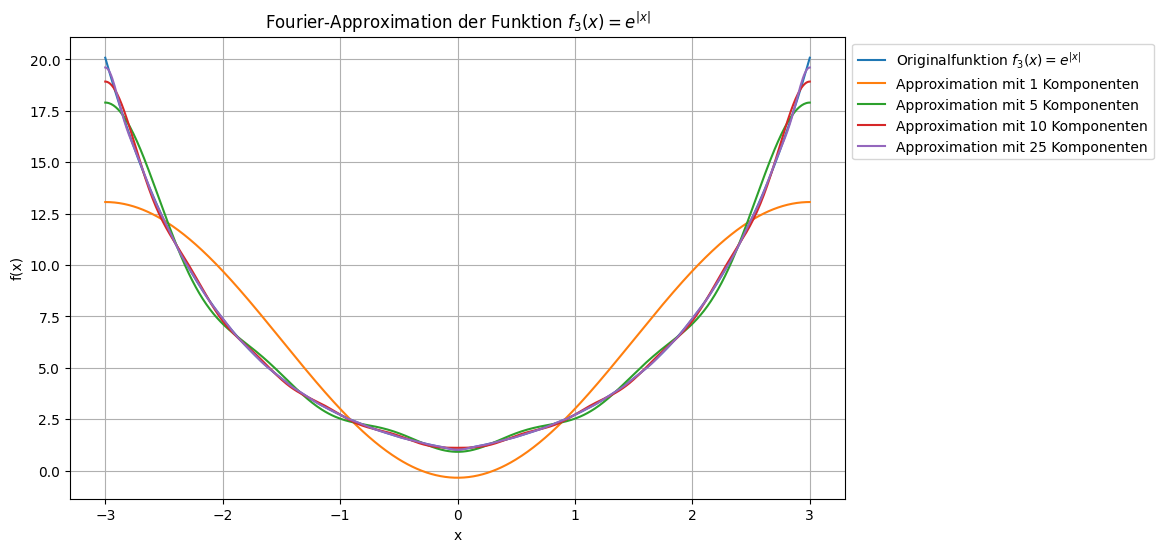

In [7]:
# Initialisierung der Listen für Fehler und m-Werte
errs_f2 = []
mm_f2 = []
errs_f3 = []
mm_f3 = []

# Diskretisierung des Intervalls [-3, 3] mit N = 600 Schritten
N = 600
x = np.linspace(-3, 3, N)

# Berechnung der Fourier-Approximation und des Fehlers für verschiedene m-Werte für f2
y_f2 = f2(x)
for m in range(2, 100):
    mm_f2.append(m)
    yappr_f2 = fourier_approximation(x, y_f2, m)
    err_f2 = relativer_fehler(y_f2, yappr_f2)
    errs_f2.append(err_f2)
    if err_f2 <= 0.001:  # Toleranz von 0,1%
        break

# Berechnung der Fourier-Approximation und des Fehlers für verschiedene m-Werte für f3
y_f3 = f3(x)
for m in range(2, 100):
    mm_f3.append(m)
    yappr_f3 = fourier_approximation(x, y_f3, m)
    err_f3 = relativer_fehler(y_f3, yappr_f3)
    errs_f3.append(err_f3)
    if err_f3 <= 0.001:  # Toleranz von 0,1%
        break

# Plotten der Fehlerkurven
plt.figure(figsize=(10, 6))
plt.plot(mm_f2, errs_f2, marker='o', label='Fehler für $f_2(x) = e^x$')
plt.plot(mm_f3, errs_f3, marker='o', label='Fehler für $f_3(x) = e^{|x|}$')
plt.xlabel('Anzahl der Komponenten (m)')
plt.ylabel('Relativer Fehler (%)')
plt.title('Fehler der Fourier-Approximation')
plt.grid(True)
plt.legend()
plt.show()

min_m_f2 = next((m for m, e in zip(mm_f2, errs_f2) if e <= 0.001), None)
min_m_f3 = next((m for m, e in zip(mm_f3, errs_f3) if e <= 0.001), None)

if min_m_f2 is not None:
    print(f'Minimale Anzahl von Fourier-Komponenten für f2(x) mit einem Fehler von höchstens 0,1%: {2*min_m_f2 + 1}')
else:
    print(f'Keine ausreichende Approximation für f2(x) innerhalb des gegebenen Bereichs gefunden.')

if min_m_f3 is not None:
    print(f'Minimale Anzahl von Fourier-Komponenten für f3(x) mit einem Fehler von höchstens 0,1%: {2*min_m_f3 + 1}')
else:
    print('Keine ausreichende Approximation für f3(x) innerhalb des gegebenen Bereichs gefunden.')

# Plotten der Ergebnisse mit der minimalen Anzahl von Komponenten
if min_m_f2 is not None:
    fapp_f2 = fourier_approximation(x, y_f2, min_m_f2)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_f2, label='Originalfunktion $f_2(x) = e^x$')
    plt.plot(x, fapp_f2, label=f'Fourier-Approximation mit {2*min_m_f2 + 1} Komponenten')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('Fourier-Approximation der Funktion $f_2(x) = e^x$')
    plt.grid(True)
    plt.show()

if min_m_f3 is not None:
    fapp_f3 = fourier_approximation(x, y_f3, min_m_f3)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_f3, label='Originalfunktion $f_3(x) = e^{|x|}$')
    plt.plot(x, fapp_f3, label=f'Fourier-Approximation mit {2*min_m_f3 + 1} Komponenten')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('Fourier-Approximation der Funktion $f_3(x) = e^{|x|}$')
    plt.grid(True)
    plt.show()

# Schritte der Komponentenanzahl für die Plots
steps = [1, 5, 10, 25]

# Funktion zur Erstellung von Plots für eine gegebene Funktion
def plot_approximation(f, f_str, steps):
    y = f(x)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'Originalfunktion ${f_str}$')
    
    for m in steps:
        fapp = fourier_approximation(x, y, m)
        plt.plot(x, fapp, label=f'Approximation mit {m} Komponenten')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(f'Fourier-Approximation der Funktion ${f_str}$')
    plt.grid(True)
    plt.show()

# Plotten der Approximationen für f2(x)
plot_approximation(f2, 'f_2(x) = e^x', steps)

# Plotten der Approximationen für f3(x)
plot_approximation(f3, 'f_3(x) = e^{|x|}', steps)

Die Fourier-Approximation für f2(x) und f3(x) zeigt unterschiedliche Konvergenzverhalten:

Für f2(x) = exp(x):
Die Approximation zeigt starkes oszillatorisches Verhalten, besonders bei niedriger Komponentenanzahl.
Selbst bei höheren Komponentenanzahlen bleiben sichtbare Oszillationen.
Dies liegt daran, dass exp(x) nicht periodisch ist und exponentielles Wachstum hat, was zu Über- und Unterschwingungen führt (Gibbs-Phänomen).

Für f3(x) = exp(abs(x)):
Die Approximation konvergiert schneller und zeigt bereits bei niedriger Komponentenanzahl eine gute Übereinstimmung.
Bei 25 Komponenten ist die Approximation sehr genau.
Dies liegt daran, dass exp(abs(x)) symmetrisch und glatter ist, wodurch es leichter durch Fourier-Reihen approximiert werden kann und das Gibbs-Phänomen weniger ausgeprägt ist.

Kurz gesagt, nicht-periodische und exponentiell wachsende Funktionen wie exp(x) sind schwieriger zu approximieren, während symmetrische und glattere Funktionen wie exp(abs(x)) schneller und genauer approximiert werden können.

## **Aufgabe 2**

**Aufgabe 2.a**

(315,) (315,)


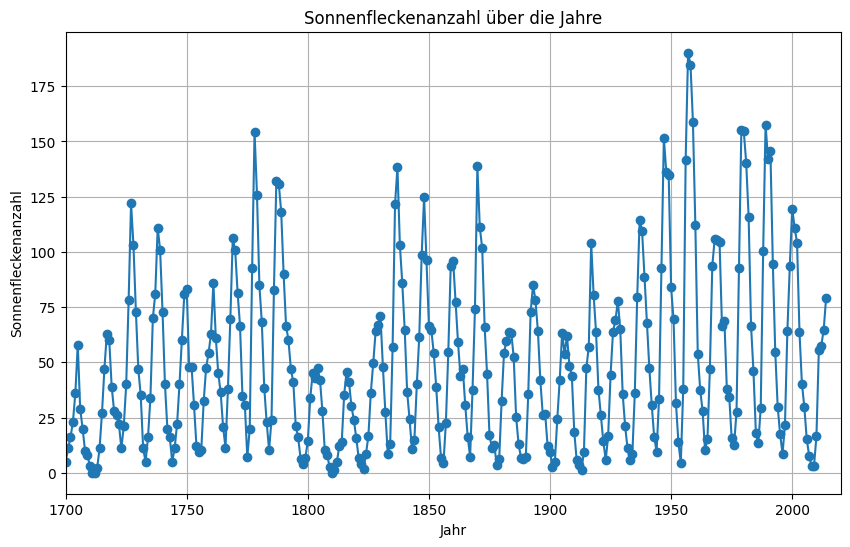

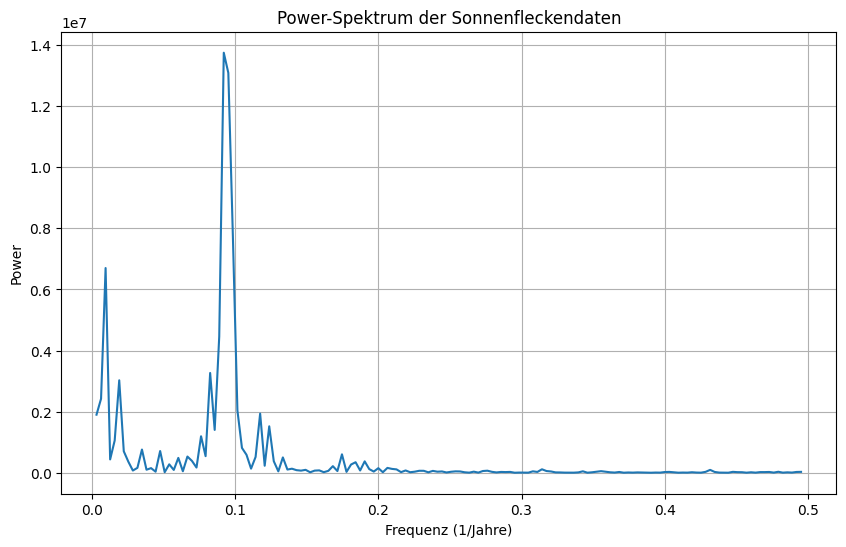

Dominante Frequenz: 0.09206349206349207 1/Jahre
Dominante Periode: 10.86206896551724 Jahre


In [8]:
def load_data(path='sunspots.txt'):
    ss_ = np.loadtxt(path)
    ss_ = ss_.reshape(-1, 2)
    date = ss_[:, 0]
    ss = ss_[:, 1]
    print(date.shape, ss.shape)
    return date, ss

# Laden der Sonnenfleckendaten
date, ss = load_data()

# Plotten der Sonnenflecken-Daten
plt.figure(figsize=(10, 6))
plt.plot(date, ss, 'o-')
plt.xlabel('Jahr')
plt.ylabel('Sonnenfleckenanzahl')
plt.xlim(1700, 2020)
plt.title('Sonnenfleckenanzahl über die Jahre')
plt.grid(True)
plt.show()

# Berechnung der Fourier-Transformation
fft_values = np.fft.fft(ss)
fft_frequencies = np.fft.fftfreq(len(ss), d=(date[1] - date[0]))

# Berechnung des Power-Spektrums
power_spectrum = np.abs(fft_values)**2

# Plotten des Power-Spektrums
plt.figure(figsize=(10, 6))
plt.plot(fft_frequencies[1:len(fft_frequencies)//2], power_spectrum[1:len(power_spectrum)//2])
plt.xlabel('Frequenz (1/Jahre)')
plt.ylabel('Power')
plt.title('Power-Spektrum der Sonnenfleckendaten')
plt.grid(True)
plt.show()

# Bestimmung der dominanten Frequenz
dominant_frequency = fft_frequencies[np.argmax(power_spectrum[1:len(power_spectrum)//2]) + 1]
dominant_period = 1 / dominant_frequency

print(f'Dominante Frequenz: {dominant_frequency} 1/Jahre')
print(f'Dominante Periode: {dominant_period} Jahre')

**Aufgabe 2.b**

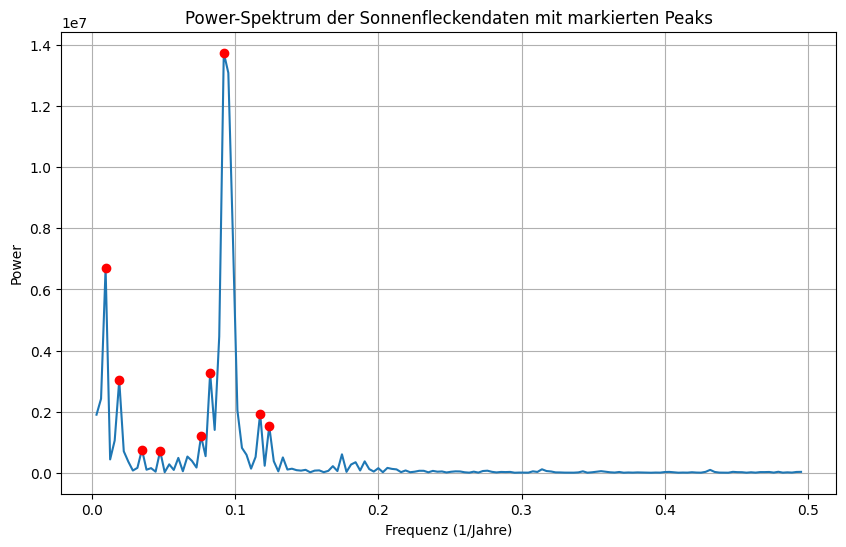

Gefundene Perioden in Jahren:
105.00 Jahre
52.50 Jahre
28.64 Jahre
21.00 Jahre
13.12 Jahre
12.12 Jahre
10.86 Jahre
8.51 Jahre
8.08 Jahre


In [9]:
# Berechnung der Fourier-Transformation
fft_values = np.fft.fft(ss)
fft_frequencies = np.fft.fftfreq(len(ss), d=(date[1] - date[0]))

# Berechnung des Power-Spektrums
power_spectrum = np.abs(fft_values)**2

# Finden der Peaks im Power-Spektrum mit niedrigerem Schwellenwert
peaks, _ = find_peaks(power_spectrum[1:len(power_spectrum)//2], height=0.05 * np.max(power_spectrum[1:len(power_spectrum)//2]))

# Berechnung der Perioden für die gefundenen Peaks
peak_frequencies = fft_frequencies[peaks + 1]
peak_periods = 1 / peak_frequencies

# Plotten des Power-Spektrums und Markierung der Peaks
plt.figure(figsize=(10, 6))
plt.plot(fft_frequencies[1:len(fft_frequencies)//2], power_spectrum[1:len(power_spectrum)//2])
plt.plot(peak_frequencies, power_spectrum[peaks + 1], 'ro')  # Markierung der Peaks
plt.xlabel('Frequenz (1/Jahre)')
plt.ylabel('Power')
plt.title('Power-Spektrum der Sonnenfleckendaten mit markierten Peaks')
plt.grid(True)
plt.show()

# Ausgabe der gefundenen Perioden
print("Gefundene Perioden in Jahren:")
for period in peak_periods:
    print(f'{period:.2f} Jahre')

**Aufgabe 2.c**

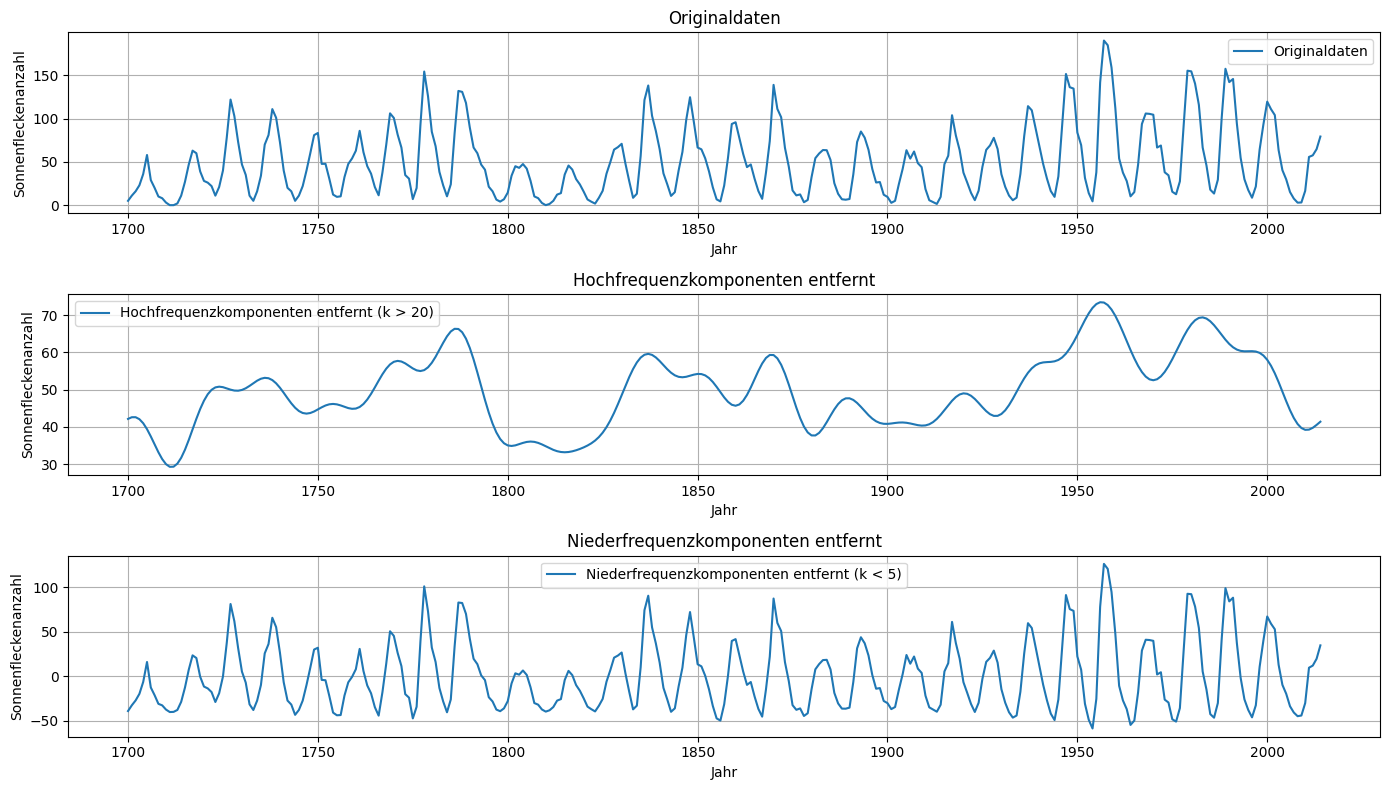

Ergebnisse der Modifikation:
Originaldaten: Mittelwert = 49.68380952380953 , Standardabweichung = 40.175830506861956
Hochfrequenzkomponenten entfernt: Mittelwert = 49.68380952380952 , Standardabweichung = 9.901035874850077
Niederfrequenzkomponenten entfernt: Mittelwert = 3.609105959416382e-16 , Standardabweichung = 37.95885467079431


In [10]:
# Berechnung der Fourier-Transformation
fft_values = np.fft.fft(ss)

# Entfernen der größten Komponenten (k > 20)
fft_values_high_removed = fft_values.copy()
fft_values_high_removed[20:] = 0  # Setze alle Komponenten ab k=21 auf 0
ss_high_removed = np.fft.ifft(fft_values_high_removed).real

# Entfernen der kleinsten Komponenten (k < 5)
fft_values_low_removed = fft_values.copy()
fft_values_low_removed[:5] = 0  # Setze die ersten 5 Komponenten auf 0
ss_low_removed = np.fft.ifft(fft_values_low_removed).real

# Plotten der Originaldaten und der modifizierten Daten
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(date, ss, label='Originaldaten')
plt.xlabel('Jahr')
plt.ylabel('Sonnenfleckenanzahl')
plt.title('Originaldaten')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(date, ss_high_removed, label='Hochfrequenzkomponenten entfernt (k > 20)')
plt.xlabel('Jahr')
plt.ylabel('Sonnenfleckenanzahl')
plt.title('Hochfrequenzkomponenten entfernt')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(date, ss_low_removed, label='Niederfrequenzkomponenten entfernt (k < 5)')
plt.xlabel('Jahr')
plt.ylabel('Sonnenfleckenanzahl')
plt.title('Niederfrequenzkomponenten entfernt')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Analyse der modifizierten Daten
print("Ergebnisse der Modifikation:")
print("Originaldaten: Mittelwert =", np.mean(ss), ", Standardabweichung =", np.std(ss))
print("Hochfrequenzkomponenten entfernt: Mittelwert =", np.mean(ss_high_removed), ", Standardabweichung =", np.std(ss_high_removed))
print("Niederfrequenzkomponenten entfernt: Mittelwert =", np.mean(ss_low_removed), ", Standardabweichung =", np.std(ss_low_removed))

Hochfrequenzkomponenten entfernt:
Dies glättet die Daten und lässt die längerfristigen Trends und langsamen Zyklen deutlicher hervortreten. Diese Art der Analyse kann hilfreich sein, um die allgemeinen Trends zu erkennen und die Hintergrundrauschen zu reduzieren.

Niederfrequenzkomponenten entfernt: 
Dies hebt die schnellen, periodischen Schwankungen hervor, indem die langfristigen Trends und langsamen Zyklen entfernt werden. Diese Methode ist nützlich, um die periodischen Muster in den Daten zu untersuchen und die wiederkehrenden Zyklen zu analysieren.


Durch die Anwendung der Fourier-Transformation und das Entfernen spezifischer Frequenzkomponenten können wir die Daten auf verschiedene Weise analysieren und unterschiedliche Aspekte der zugrunde liegenden Muster und Zyklen hervorheben.

**Aufgabe 2.d**

Die Fourier-Analyse zeigt deutliche Unterschiede zwischen den analytischen Funktionen in Aufgabe 1 und den realen Sonnenfleckendaten in Aufgabe 2. In Aufgabe 1 wurden glatte, nicht periodische Funktionen betrachtet, was die Fourier-Approximation erschwert und zu starken Oszillationen führt. Im Gegensatz dazu sind die Sonnenfleckendaten periodisch, was sich im Power-Spektrum als dominante Frequenz zeigt und die Periodizität des Sonnenzyklus widerspiegelt. Das Herausfiltern von Komponenten ist bei den analytischen Funktionen wenig sinnvoll, da sie keine periodischen Muster haben. Bei den Sonnenfleckendaten hingegen hebt das Entfernen hoher Frequenzen die langfristigen Trends hervor, während das Entfernen niedriger Frequenzen die kurzfristigen Schwankungen betont. Die Fourier-Approximation der analytischen Funktionen benötigt viele Komponenten für eine genaue Approximation, während die Fourier-Analyse der Sonnenfleckendaten eine klare Identifikation von Perioden und Strukturen ermöglicht.

## **Aufgabe 3**

**Aufgabe 3.a**

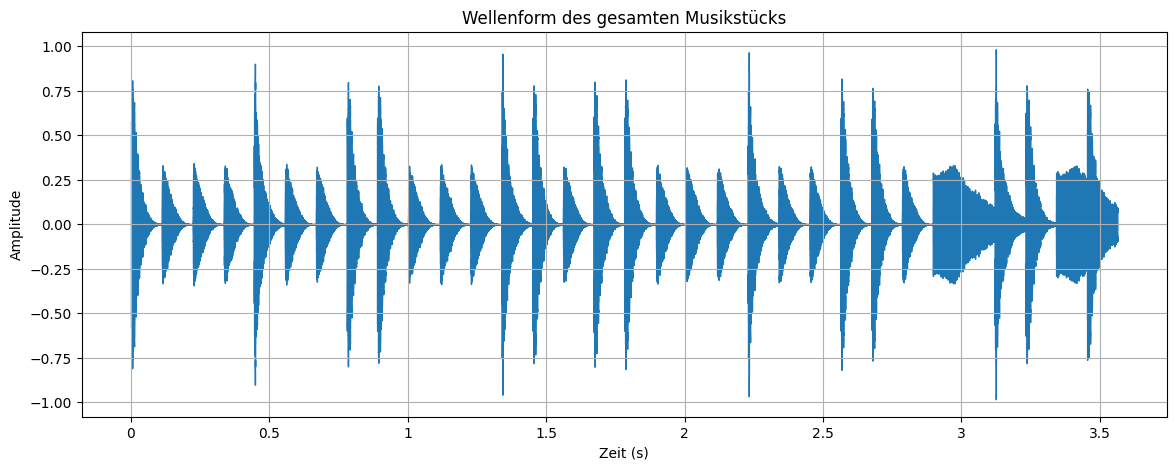

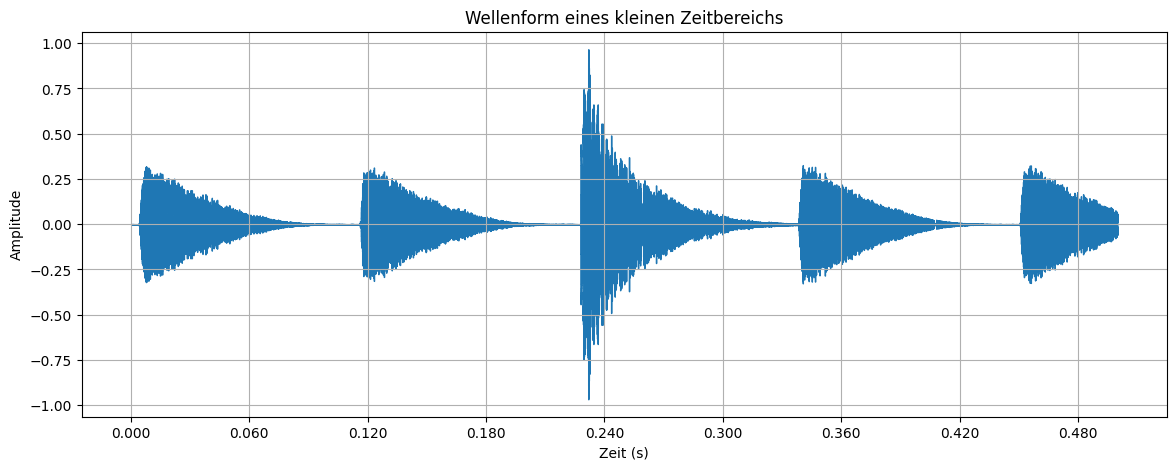

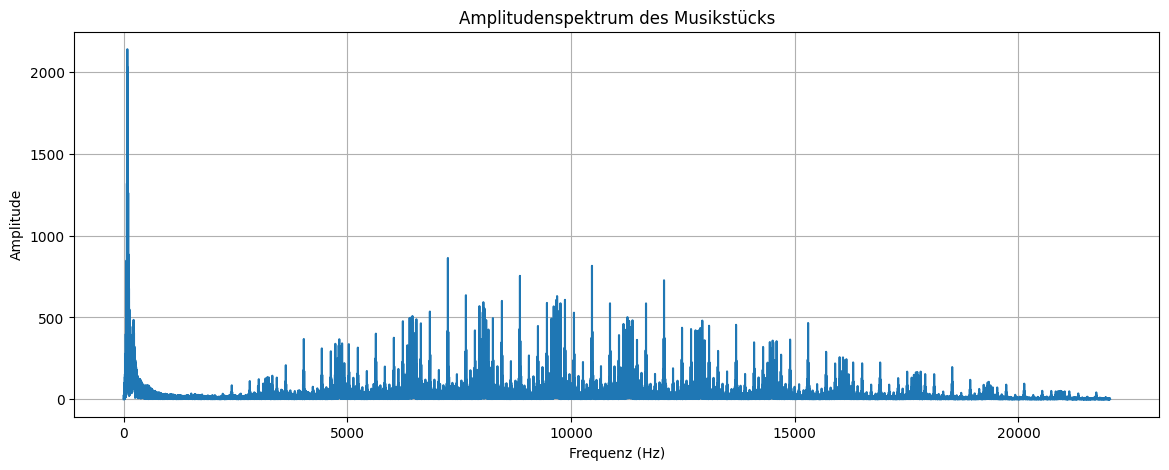

In [11]:
# Laden der Audiodatei
file_path = 'music.wav'  # Passen Sie den Pfad zur Datei an
y, sr = librosa.load(file_path, sr=None)

# Plotten der vollständigen Wellenform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Wellenform des gesamten Musikstücks')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotten der Wellenform für einen kleinen Zeitbereich
start = int(2 * sr)  # Startzeitpunkt in Samples
end = int(2.5 * sr)    # Endzeitpunkt in Samples
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y[start:end], sr=sr)
plt.title('Wellenform eines kleinen Zeitbereichs')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Berechnung des Amplitudenspektrums
fft_values = np.fft.fft(y)
fft_frequencies = np.fft.fftfreq(len(y), d=1/sr)
amplitude_spectrum = np.abs(fft_values)

# Plotten des Amplitudenspektrums
plt.figure(figsize=(14, 5))
plt.plot(fft_frequencies[:len(fft_frequencies)//2], amplitude_spectrum[:len(amplitude_spectrum)//2])
plt.title('Amplitudenspektrum des Musikstücks')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Erklärung der Symmetrie im Amplitudenspektrum:

Das Amplitudenspektrum ist symmetrisch bezüglich des Vorzeichens, weil die Fourier-Transformation von reellen Signalen immer eine symmetrische Frequenzdarstellung hat. Dies liegt daran, dass die Fourier-Transformation komplexwertig ist und die positiven und negativen Frequenzanteile zueinander konjugiert sind.

**Aufgabe 3.b**

Top 5 Frequenzen unterhalb von 2 kHz:
Frequenz: 89.79 Hz, Amplitude: 2027.00
Frequenz: -81.93 Hz, Amplitude: 2116.92
Frequenz: 81.93 Hz, Amplitude: 2116.92
Frequenz: -80.81 Hz, Amplitude: 2138.61
Frequenz: 80.81 Hz, Amplitude: 2138.61

Top 5 Frequenzen oberhalb von 2 kHz:
Frequenz: 8857.43 Hz, Amplitude: 753.93
Frequenz: -10467.69 Hz, Amplitude: 815.16
Frequenz: 10467.69 Hz, Amplitude: 815.16
Frequenz: 7246.89 Hz, Amplitude: 863.01
Frequenz: -7246.89 Hz, Amplitude: 863.01


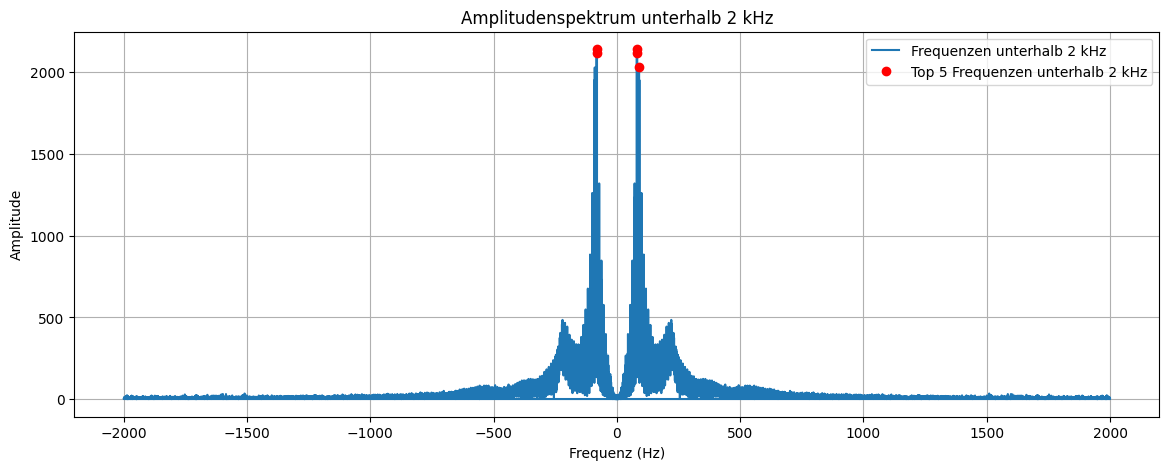

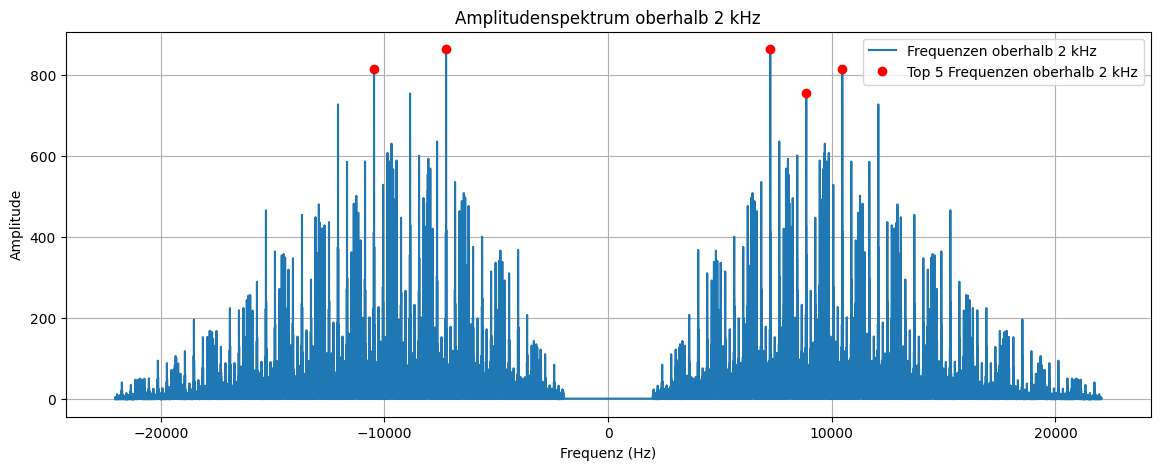

In [12]:
# Berechnung der Fourier-Transformation
fft_values = np.fft.fft(y)
fft_frequencies = np.fft.fftfreq(len(y), d=1/sr)
amplitude_spectrum = np.abs(fft_values)

# Trennen der Frequenzen oberhalb und unterhalb von 2 kHz
threshold = 2000  # 2 kHz
index_threshold = np.where(np.abs(fft_frequencies) > threshold)[0][0]

# Frequenzen unterhalb 2 kHz
low_freq_indices = np.where(np.abs(fft_frequencies) < threshold)
low_freq_amplitudes = amplitude_spectrum[low_freq_indices]
low_freq_frequencies = fft_frequencies[low_freq_indices]

# Frequenzen oberhalb 2 kHz
high_freq_indices = np.where(np.abs(fft_frequencies) > threshold)
high_freq_amplitudes = amplitude_spectrum[high_freq_indices]
high_freq_frequencies = fft_frequencies[high_freq_indices]

# Identifikation der Top 5 Frequenzen in beiden Bereichen
top_5_low_indices = np.argsort(low_freq_amplitudes)[-5:]
top_5_high_indices = np.argsort(high_freq_amplitudes)[-5:]

top_5_low_frequencies = low_freq_frequencies[top_5_low_indices]
top_5_low_amplitudes = low_freq_amplitudes[top_5_low_indices]

top_5_high_frequencies = high_freq_frequencies[top_5_high_indices]
top_5_high_amplitudes = high_freq_amplitudes[top_5_high_indices]

# Ausgabe der Ergebnisse
print("Top 5 Frequenzen unterhalb von 2 kHz:")
for freq, amp in zip(top_5_low_frequencies, top_5_low_amplitudes):
    print(f"Frequenz: {freq:.2f} Hz, Amplitude: {amp:.2f}")

print("\nTop 5 Frequenzen oberhalb von 2 kHz:")
for freq, amp in zip(top_5_high_frequencies, top_5_high_amplitudes):
    print(f"Frequenz: {freq:.2f} Hz, Amplitude: {amp:.2f}")

# Plotten der Amplitudenspektren für beide Bereiche
plt.figure(figsize=(14, 5))
plt.plot(low_freq_frequencies, low_freq_amplitudes, label='Frequenzen unterhalb 2 kHz')
plt.plot(top_5_low_frequencies, top_5_low_amplitudes, 'ro', label='Top 5 Frequenzen unterhalb 2 kHz')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitudenspektrum unterhalb 2 kHz')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(high_freq_frequencies, high_freq_amplitudes, label='Frequenzen oberhalb 2 kHz')
plt.plot(top_5_high_frequencies, top_5_high_amplitudes, 'ro', label='Top 5 Frequenzen oberhalb 2 kHz')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitudenspektrum oberhalb 2 kHz')
plt.legend()
plt.grid(True)
plt.show()

**Aufgabe 3.c**

Rekonstruktionsfehler für das Tiefpass-gefilterte Signal: 0.0505
Rekonstruktionsfehler für das Hochpass-gefilterte Signal: 0.0311


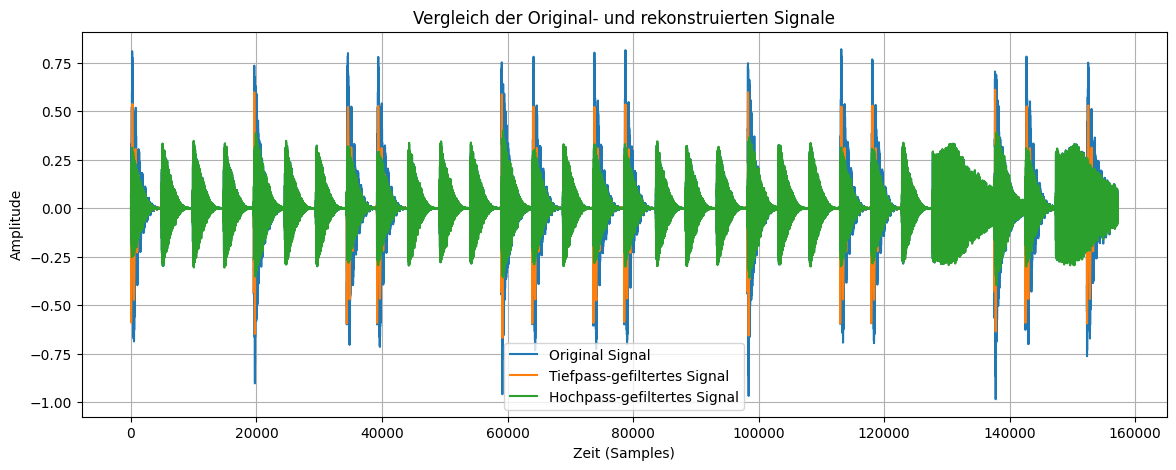

In [13]:
# Berechnung der Fourier-Transformation
fft_values = np.fft.fft(y)
fft_frequencies = np.fft.fftfreq(len(y), d=1/sr)
amplitude_spectrum = np.abs(fft_values)

# Trennen der Frequenzen oberhalb und unterhalb von 2 kHz
threshold = 2000  # 2 kHz
index_threshold = np.where(np.abs(fft_frequencies) > threshold)[0][0]

# Kopien der Fourier-Koeffizienten für Filterung
low_pass_fft = fft_values.copy()
high_pass_fft = fft_values.copy()

# Nullsetzen der unerwünschten Frequenzen
low_pass_fft[np.abs(fft_frequencies) > threshold] = 0
high_pass_fft[np.abs(fft_frequencies) < threshold] = 0

# Rekonstruktion der gefilterten Signale
low_pass_signal = np.fft.ifft(low_pass_fft).real
high_pass_signal = np.fft.ifft(high_pass_fft).real

# Berechnung des Rekonstruktionsfehlers
def reconstruction_error(original, reconstructed):
    return np.mean(np.abs(original - reconstructed))

low_pass_error = reconstruction_error(y, low_pass_signal)
high_pass_error = reconstruction_error(y, high_pass_signal)

# Speichern der rekonstruierten Signale in wav-Dateien
sf.write('low_pass_reconstructed.wav', low_pass_signal, sr)
sf.write('high_pass_reconstructed.wav', high_pass_signal, sr)

# Beschreibung und Erklärung der Ergebnisse
print(f'Rekonstruktionsfehler für das Tiefpass-gefilterte Signal: {low_pass_error:.4f}')
print(f'Rekonstruktionsfehler für das Hochpass-gefilterte Signal: {high_pass_error:.4f}')

# Plotten der Original- und rekonstruierten Signale
plt.figure(figsize=(14, 5))
plt.plot(y, label='Original Signal')
plt.plot(low_pass_signal, label='Tiefpass-gefiltertes Signal')
plt.plot(high_pass_signal, label='Hochpass-gefiltertes Signal')
plt.xlabel('Zeit (Samples)')
plt.ylabel('Amplitude')
plt.title('Vergleich der Original- und rekonstruierten Signale')
plt.legend()
plt.grid(True)
plt.show()

Erklärung der Ergebnisse:

Signalfilterung:

Ein Tiefpassfilter lässt Frequenzen unterhalb einer bestimmten Schwelle durch und dämpft höhere Frequenzen.
Ein Hochpassfilter lässt Frequenzen oberhalb einer bestimmten Schwelle durch und dämpft niedrigere Frequenzen.

Rekonstruktion:

Die rekonstruierten Signale basieren auf der inversen Fourier-Transformation der gefilterten Signale.

Fehlerberechnung:

Der Fehler wird als mittlere quadratische Abweichung zwischen dem Original- und dem rekonstruierten Signal berechnet. Dieser Fehler gibt an, wie genau die rekonstruierten Signale dem Originalsignal entsprechen.

Speicherung:

Die rekonstruierten Signale werden in WAV-Dateien gespeichert, damit sie später analysiert oder angehört werden können.

Das Amplitudenspektrum ist symmetrisch, weil die Fourier-Transformation eines reellen Signals zu einer komplexen Frequenzdarstellung führt, in der positive und negative Frequenzanteile zueinander konjugiert sind.

## **Aufgabe 4**

**Aufgabe 4.a**

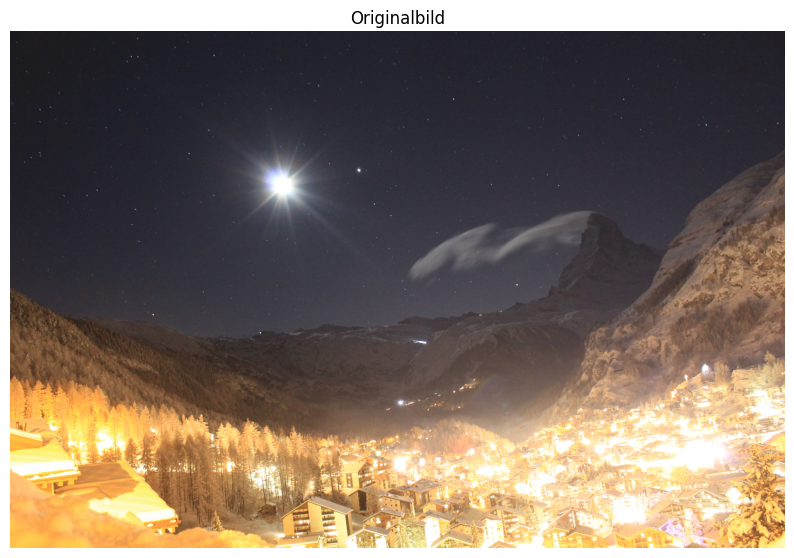

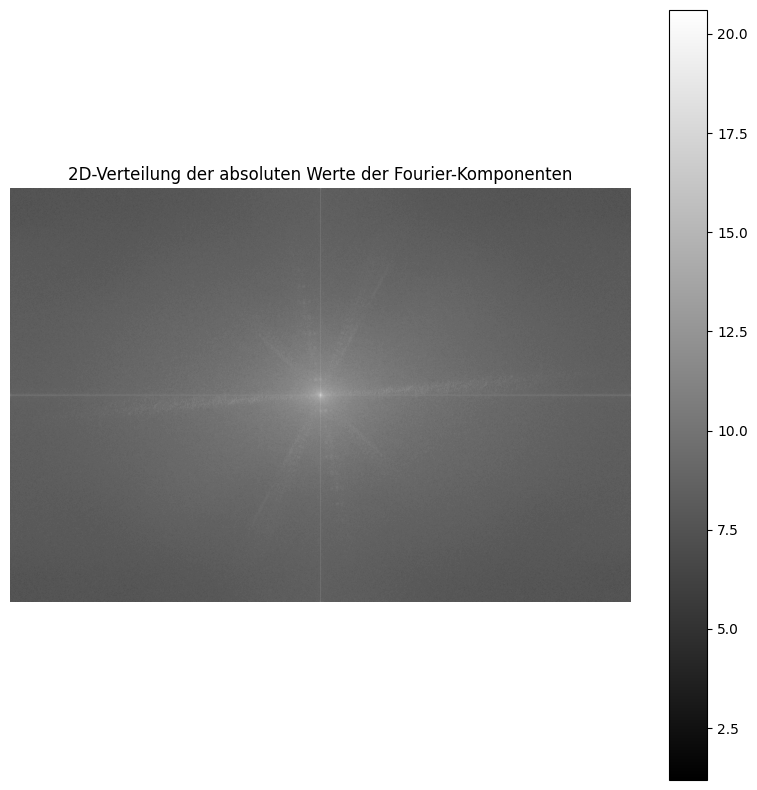

In [14]:
# Laden des Bildes
file_path = 'img.jpg'
image = Image.open(file_path)
image_array = np.array(image)

# Anwendung der 2D-Fourier-Transformation
fft_values = fft2(image_array[:, :, 0])

# Verschieben der Nullfrequenzkomponente in die Mitte des Spektrums
fft_shifted = fftshift(fft_values)

# Berechnung der absoluten Werte der Fourier-Komponenten
magnitude_spectrum = np.abs(fft_shifted)

# Plotten des Originalbildes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Originalbild')
plt.axis('off')
plt.show()

# Plotten der 2D-Verteilung der Fourier-Komponenten in Grau
plt.figure(figsize=(10, 10))
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')  # Graue Darstellung
plt.title('2D-Verteilung der absoluten Werte der Fourier-Komponenten')
plt.colorbar()
plt.axis('off')
plt.show()

Erklärung der Natur der Verteilung:

Zentrierung der Nullfrequenz:

Die Funktion fftshift verschiebt die Nullfrequenzkomponente in die Mitte des Spektrums. Das ist wichtig, da die tiefsten Frequenzen oft am wichtigsten sind und es so leichter ist, ihre Position und Amplitude zu interpretieren.

Symmetrie des Spektrums:

Das resultierende Spektrum ist symmetrisch bezüglich der Nullfrequenz. Dies liegt daran, dass das Fourier-Spektrum eines realen Signals konjugiert symmetrisch ist.

Verteilung der Energie:

Im Spektrum sind die tiefen Frequenzen (mit niedrigen k-Werten) in der Mitte konzentriert, während höhere Frequenzen weiter von der Mitte entfernt sind. Dies hilft zu verstehen, wie die Energie des Signals über verschiedene Frequenzkomponenten verteilt ist.

Logarithmische Darstellung:

Die Verwendung einer logarithmischen Darstellung (np.log1p) hilft, den Dynamikumfang zu komprimieren und sowohl hohe als auch niedrige Amplituden sichtbar zu machen. Dies ist besonders nützlich, um Details in Spektren mit großem Dynamikumfang zu erkennen.

**Aufgabe 4.b**

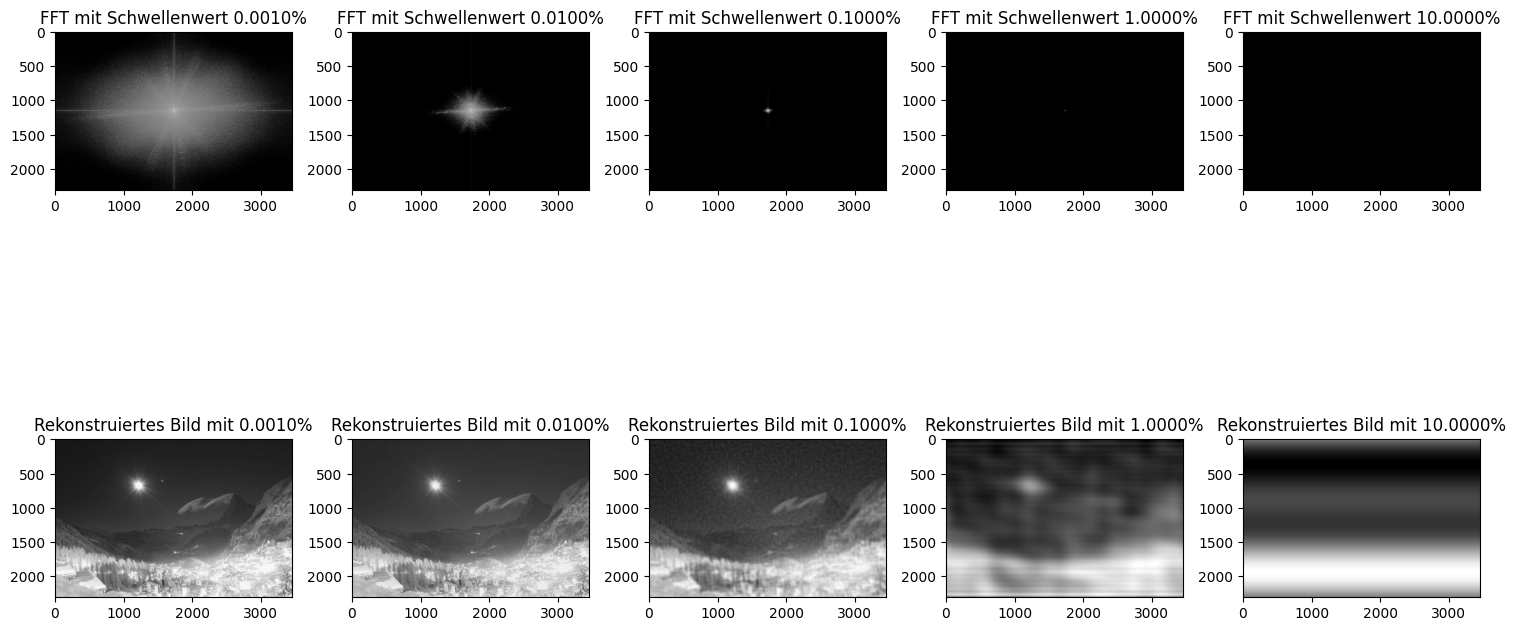

In [15]:
image = Image.open(file_path).convert('L') # Bild in Graustufen konvertieren
image_array = np.array(image)

# Anwendung der 2D-Fourier-Transformation
fft_values = fft2(image_array)

# Verschieben der Nullfrequenzkomponente in die Mitte des Spektrums
fft_shifted = fftshift(fft_values)

# Berechnung der absoluten Werte der Fourier-Komponenten
magnitude_spectrum = np.abs(fft_shifted)
max_amplitude = np.max(magnitude_spectrum)

# Schwellenwerte in Prozent der maximalen Amplitude
thresholds = [0.00001, 0.0001, 0.001, 0.01, 0.1]

# Funktion zur Anwendung des Schwellenwerts und der inversen Fourier-Transformation
def filter_and_inverse_transform(fft_shifted, threshold):
    filtered_fft = fft_shifted.copy()
    filtered_fft[magnitude_spectrum < threshold] = 0
    reconstructed_image = ifft2(ifftshift(filtered_fft)).real
    return filtered_fft, reconstructed_image

# Plotten der gefilterten Fourier-Komponenten und der resultierenden Bilder
plt.figure(figsize=(15, 10))

for i, threshold in enumerate(thresholds):
    threshold_value = max_amplitude * threshold
    filtered_fft, reconstructed_image = filter_and_inverse_transform(fft_shifted, threshold_value)

    plt.subplot(2, len(thresholds), i + 1)
    plt.imshow(np.log1p(np.abs(filtered_fft)), cmap='gray')
    plt.title(f'FFT mit Schwellenwert {threshold*100:.4f}%')

    plt.subplot(2, len(thresholds), i + 1 + len(thresholds))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Rekonstruiertes Bild mit {threshold*100:.4f}%')

plt.tight_layout()
plt.show()

Erklärung der Unterschiede:

Die Fourier-Transformation zerlegt das Bild in seine Frequenzkomponenten.
Niedrige Schwellenwerte lassen die meisten dieser Komponenten unberührt, sodass das rekonstruierte Bild fast identisch zum Original bleibt.

Mit steigenden Schwellenwerten werden mehr Frequenzkomponenten entfernt, was zu einem Verlust an Details und einer stärkeren Unschärfe im rekonstruierten Bild führt. 

Hohe Schwellenwerte behalten nur die größten Amplituden bei, was bedeutet, dass nur die grundlegenden Strukturen des Bildes erhalten bleiben, während feine Details verloren gehen.

Diese Filterung zeigt, wie wichtig verschiedene Frequenzkomponenten für die Bildklarheit und Detailgenauigkeit sind.

**Aufgabe 4.c**

In [16]:
# Anwendung der 2D-Fourier-Transformation
fft_values = fft2(image_array)

# Verschieben der Nullfrequenzkomponente in die Mitte des Spektrums
fft_shifted = fftshift(fft_values)

# Berechnung der absoluten Werte der Fourier-Komponenten
magnitude_spectrum = np.abs(fft_shifted)
max_amplitude = np.max(magnitude_spectrum)

# Funktion zur Berechnung des relativen Fehlers
def calculate_relative_error(original, reconstructed):
    return np.mean(np.abs(original - reconstructed) / np.abs(original)) * 100

# Funktion zur Anwendung des Schwellenwerts und der inversen Fourier-Transformation
def filter_and_inverse_transform(fft_shifted, threshold):
    filtered_fft = fft_shifted.copy()
    filtered_fft[magnitude_spectrum < threshold] = 0
    filtered_fft = ifftshift(filtered_fft)
    reconstructed_image = ifft2(filtered_fft).real
    return reconstructed_image

# Initialisierung
threshold = 0
error = 0
step = max_amplitude * 0.001  # Schwellenwertschritte

# Suche nach dem Schwellenwert, bei dem der Fehler 1% erreicht
while error < 1:
    threshold += step
    reconstructed_image = filter_and_inverse_transform(fft_shifted, threshold)
    error = calculate_relative_error(image_array, reconstructed_image)

print(f"Schwellenwert, bei dem der Fehler 1% erreicht: {threshold:.4f}")
print(f"Anzahl der verbleibenden Fourier-Koeffizienten: {np.sum(magnitude_spectrum >= threshold)}")

Schwellenwert, bei dem der Fehler 1% erreicht: 783683.8600
Anzahl der verbleibenden Fourier-Koeffizienten: 4172
